## Back Test with Latest Data
### horizon： 2014-12-31 to 2020-06-05， 1367 trading days
### assets：
1. SPY : S&P 500 ETF Trust 
2. EFA: iShares MSCI EAFE ETF (European stock)
3. EWJ: iShares MSCI Japan ETF
4. EEM: iShares MSCI Emerging Markets ETF
5. IYR: iShares U.S. Real Estate ETF 
6. RWX: Dow Jones International Real Estate ETF 
7. IEF: iShares 7-10 Year Treasury Bond ETF 
8. TLT: iShares 20+ Year Treasury Bond ETF
9. DBC: DB Commodity Index Tracking Fund
10. GLD: SPDR Gold Shares

### 0. Import Packages

In [2]:
import pymysql
from pandas_datareader import data as web
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
import scipy.optimize as sco
from Asset_Management_helper import *

### 1. Load data 

In [ ]:
# From api
tickers = ['SPY','EFA','EWJ','EEM','IYR','RWX','IEF','TLT','DBC','GLD'] # list of asset indexes
api = 'yahoo'
start_date = "2014-12-31"
end_date = "2020-06-05"

data = dataloader(tickers, api, start_date, end_date, panel=False)

In [2]:
# from local machine
close_frame = pd.read_csv('2014-12-31,2020-06-05.csv', index_col=0)

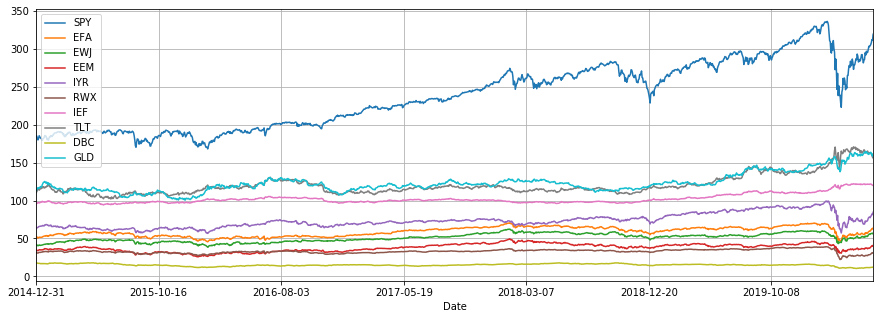

In [5]:
close_frame.plot(grid=True)

### 2. Construct Portifolio

#### 2.0 basic settings

In [6]:
# Initial investment
capital = 1
# prices = close_frame.copy()

# Store strategy performances
portfolios = {}

###########          Adaptive Asset Allocation parameters    #################
n_top = 5       # number of momentum positions
n_mom = 6 * 22    # length of momentum look back
n_vol = 1 * 22    # length of volatility look back 
n_reb = 1 * 22   # rebalance frequency

#### 2.1 Equal Weight

In [7]:
strategy = 'EqualWeight'
equal_weight = EqualWeight(close_frame, n_reb)

In [8]:
return_frame = equal_weight.returns
weights = equal_weight.cal_weights()
weights.to_csv(strategy + '_weights' + '.csv')
cal_portfolio_return(weights, return_frame, strategy, output=True)

,portfolio_return
Date,
2014-12-31,0.000000
2015-01-02,0.000253
2015-01-05,-0.005212
2015-01-06,-0.001111
2015-01-07,0.007461
...,...
2020-06-01,0.010942
2020-06-02,0.007849
2020-06-03,0.008912


In [9]:
save_metrics(portfolios, strategy,capital,return_frame, weights)

average yearly return is 3.75%
yearly volatility is 10.89%
yearly sharp ratio is 34.44%
positive rolling years is 0.7491039426523297
maximum drawdown is -23.41%


{'EqualWeight': {'Return': 0.03751973849813835,
  'Volatility': 0.10894208748358443,
  'SharpRatio': 0.3444007670937266,
  'Value': 1.2257215519205347,
  'PositiveRollingYears': 0.7491039426523297,
  'MaxMarkdown': -0.23405148296655603}}

#### 2.2 Risk Parity

In [10]:
strategy = 'RiskParity'
risk_par = RiskParity(close_frame, n_reb, n_vol)

In [11]:
return_frame = risk_par.returns
weights = risk_par.cal_weights()
weights.to_csv(strategy + '_weights' + '.csv')
cal_portfolio_return(weights, return_frame, strategy, output=True)

,portfolio_return
Date,
2014-12-31,0.000000
2015-01-02,0.000253
2015-01-05,-0.005212
2015-01-06,-0.001111
2015-01-07,0.007461
...,...
2020-06-01,0.005476
2020-06-02,0.003294
2020-06-03,0.002536


In [12]:
pd.DataFrame(save_metrics(portfolios, strategy,capital,return_frame, weights))

average yearly return is 3.31%
yearly volatility is 8.54%
yearly sharp ratio is 38.77%
positive rolling years is 0.7885304659498208
maximum drawdown is -19.59%


,EqualWeight,RiskParity
Return,0.037520,0.033124
Volatility,0.108942,0.085429
SharpRatio,0.344401,0.387743
Value,1.225722,1.196842
PositiveRollingYears,0.749104,0.788530
MaxMarkdown,-0.234051,-0.195922


#### 2.3 EqualMomentum

In [13]:
strategy = 'EqualMomentum'
equal_mom = EqualMomentum(close_frame,n_reb, n_vol, n_mom, n_top)

In [24]:
return_frame = equal_mom.returns
weights = equal_mom.cal_weights()
weights.to_csv(strategy + '_weights' + '.csv')
cal_portfolio_return(weights, return_frame, strategy, output=True)

,portfolio_return
Date,
2014-12-31,0.000000
2015-01-02,0.006457
2015-01-05,0.004349
2015-01-06,0.006740
2015-01-07,0.003441
...,...
2020-06-01,0.003305
2020-06-02,0.000179
2020-06-03,-0.003570


In [25]:
pd.DataFrame(save_metrics(portfolios, strategy,capital,return_frame, weights))

average yearly return is 4.83%
yearly volatility is 10.10%
yearly sharp ratio is 47.83%
positive rolling years is 0.7598566308243727
maximum drawdown is -16.77%


,EqualWeight,RiskParity,EqualMomentum
Return,0.037520,0.033124,0.048304
Volatility,0.108942,0.085429,0.100984
SharpRatio,0.344401,0.387743,0.478337
Value,1.225722,1.196842,1.299568
PositiveRollingYears,0.749104,0.788530,0.759857
MaxMarkdown,-0.234051,-0.195922,-0.167713


#### 2.4 RiskParMomentum

In [26]:
strategy = 'RiskParMomentum'
risk_par_mom = RiskParMomentum(close_frame,n_reb, n_vol, n_mom, n_top)

In [29]:
return_frame = risk_par_mom.returns
weights = risk_par_mom.cal_weights()
weights.to_csv(strategy + '_weights' + '.csv')
cal_portfolio_return(weights, return_frame, strategy, output=True)

,portfolio_return
Date,
2014-12-31,0.000000
2015-01-02,-0.000815
2015-01-05,-0.013669
2015-01-06,-0.006819
2015-01-07,0.014446
...,...
2020-06-01,0.000872
2020-06-02,-0.001448
2020-06-03,-0.005268


In [30]:
pd.DataFrame(save_metrics(portfolios, strategy,capital,return_frame, weights))

average yearly return is 4.61%
yearly volatility is 9.00%
yearly sharp ratio is 51.23%
positive rolling years is 0.796594982078853
maximum drawdown is -13.06%


,EqualWeight,RiskParity,EqualMomentum,RiskParMomentum
Return,0.037520,0.033124,0.048304,0.046118
Volatility,0.108942,0.085429,0.100984,0.090020
SharpRatio,0.344401,0.387743,0.478337,0.512309
Value,1.225722,1.196842,1.299568,1.284247
PositiveRollingYears,0.749104,0.788530,0.759857,0.796595
MaxMarkdown,-0.234051,-0.195922,-0.167713,-0.130600


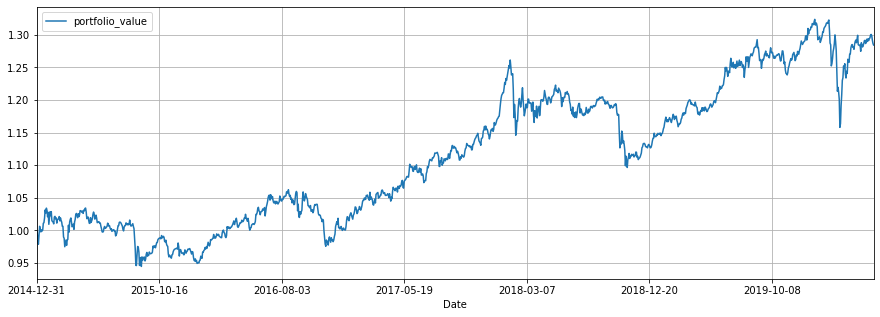

In [31]:
p_value = cal_portfolio_value(cal_portfolio_return(weights, return_frame, strategy),capital)
p_value.plot(grid=True)

#### 2.5 MinVarMomentum

In [32]:
strategy = 'MinVarMomentum'
min_var_mom = MinVarMomentum(close_frame, n_reb, n_vol, n_mom, n_top)

In [44]:
return_frame = min_var_mom.returns
weights = min_var_mom.get_minVar_momentum_weights()
# 可以发现从 2020-03-31 之后，所有的资产都只配置在IEF， 也就是 7-10 Year Treasury Bond ETF
weights.to_csv(strategy + '_weights' + '.csv')
cal_portfolio_return(weights, return_frame, strategy, output=True)

,portfolio_return
Date,
2014-12-31,0.000000
2015-01-02,0.000253
2015-01-05,-0.005212
2015-01-06,-0.001111
2015-01-07,0.007461
...,...
2020-06-01,-0.000394
2020-06-02,-0.001644
2020-06-03,-0.005940


In [45]:
pd.DataFrame(save_metrics(portfolios, strategy,capital,return_frame, weights))

average yearly return is 1.99%
yearly volatility is 12.68%
yearly sharp ratio is 15.67%
positive rolling years is 0.6872759856630825
maximum drawdown is -24.50%


,EqualWeight,RiskParity,EqualMomentum,RiskParMomentum,MinVarMomentum
Return,0.037520,0.033124,0.048304,0.046118,0.019868
Volatility,0.108942,0.085429,0.100984,0.090020,0.126806
SharpRatio,0.344401,0.387743,0.478337,0.512309,0.156679
Value,1.225722,1.196842,1.299568,1.284247,1.113797
PositiveRollingYears,0.749104,0.788530,0.759857,0.796595,0.687276
MaxMarkdown,-0.234051,-0.195922,-0.167713,-0.130600,-0.244987


#### 2.6 探究最小方差动量法失效的原因

In [ ]:
min_var_mom_returns = pd.read_csv('MinVarMomentum_return.csv', index_col=0)
min_var_mom_weights = pd.read_csv('MinVarMomentum_weights.csv', index_col=0)

我们发现本应该取得优异表现的最小方差动量法却成了表现最差的策略。仔细观察资产价值变化图可以发现，在正常市场情况下，该策略表现得非常亮眼，收益高而且波动较小。但是在受到新冠病毒影响而全球股市大跌的2020年2-3月期间，其价值出现闪崩，一路重挫，直到四月初才有所恢复。如下图：

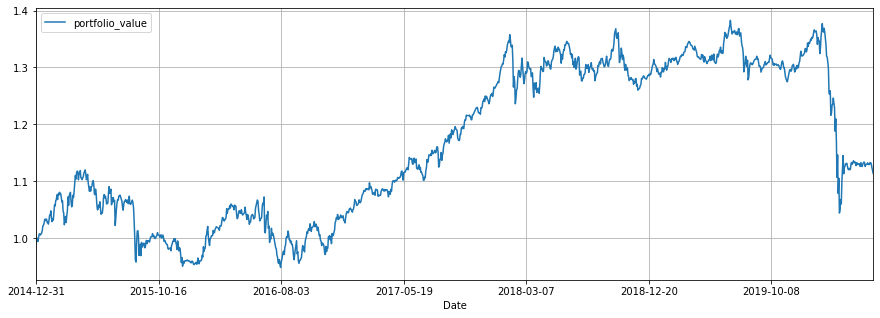

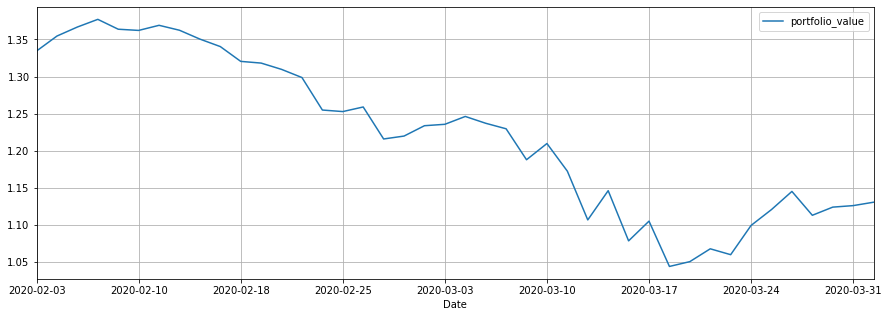

In [59]:
p_value = cal_portfolio_value(min_var_mom_returns,capital)
p_value.plot(grid=True)
p_value.loc['2020-02-01':'2020-04-01'].plot(grid=True)

在闪崩期间，该策略的持仓情况是：

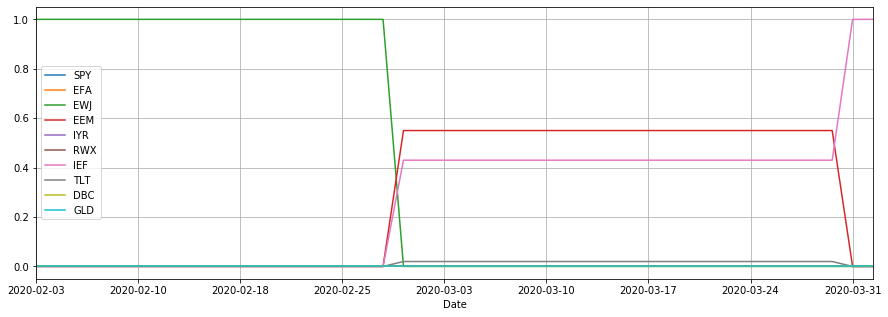

In [69]:
min_var_mom_weights.loc['2020-02-01':'2020-04-01'].plot(grid=True)

可以看出，主要亏损发生在大量持有EEM，也就是新兴市场指数ETF的时候。新兴市场指数ETF的表现是：

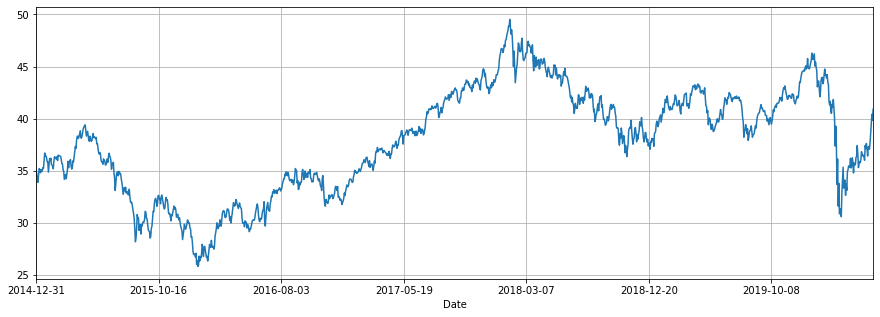

In [74]:
close_frame.EEM.plot(grid=True)

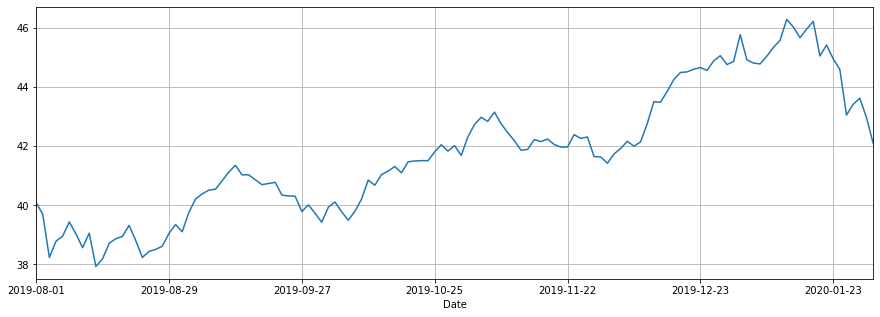

In [80]:
close_frame.EEM.loc['2019-08-01': '2020-01-31'].plot(grid=True)

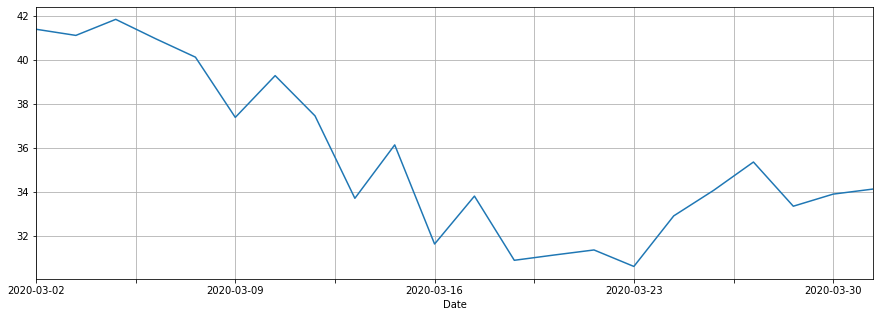

In [105]:
close_frame.EEM.loc['2020-03-01': '2020-03-31'].plot(grid=True)

可以看出，在出现突然的闪崩之前的六个月动量观察期（2019年8月到2020年2月），EEM 的表现相当优异，可能因此误导了最小方差动量策略，使其做出重仓EEM的决策。\
但是并不能以出现重挫来否定该策略的效果，因为该策略受到一个较低换仓频率的限制。我们可以看出在三月底的换仓期，该策略迅速做出调整，清空所有EEM仓位，而只投资IEF，也就是七到十年期美国国债。这一决策应该是明智的，因为IEF在全球股市闪崩期间表现得相当稳定：

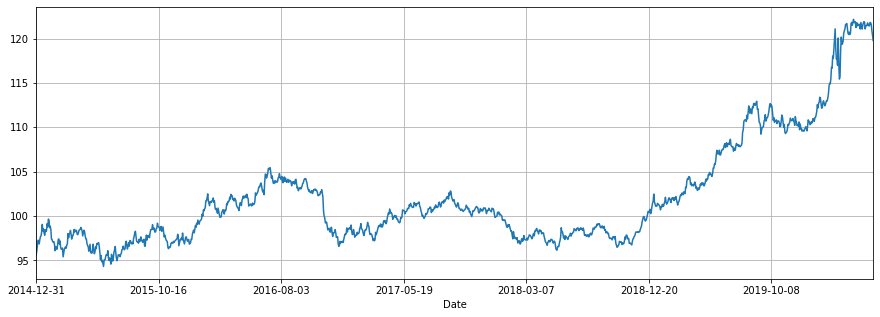

In [85]:
close_frame.IEF.plot(grid=True)

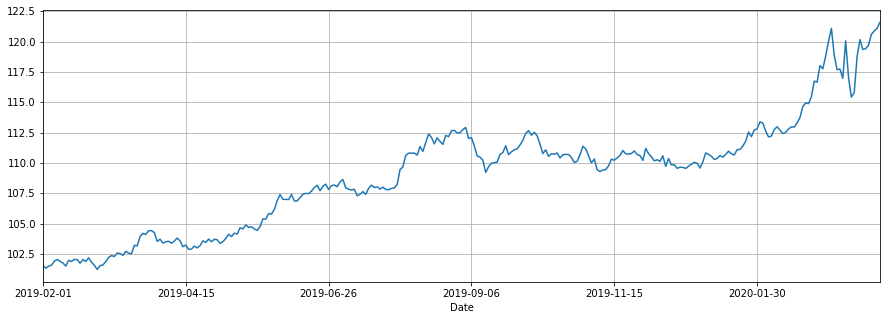

In [86]:
close_frame.IEF.loc['2019-02-01': '2020-04-01'].plot(grid=True)

为了验证最小方差动量策略是否被换仓频率所拖累，在其他参数不变的情况下，我们将换仓频率大幅缩短到3个交易日：

In [95]:
strategy = 'MinVarMomentum'
min_var_mom = MinVarMomentum(close_frame, 3, n_vol, n_mom, n_top)

In [96]:
return_frame = min_var_mom.returns
weights = min_var_mom.get_minVar_momentum_weights()

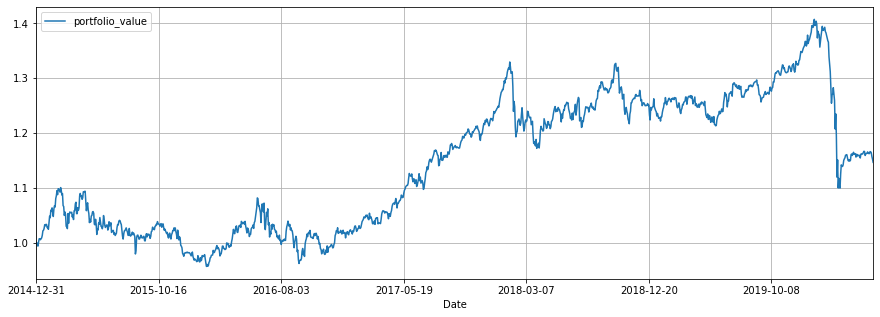

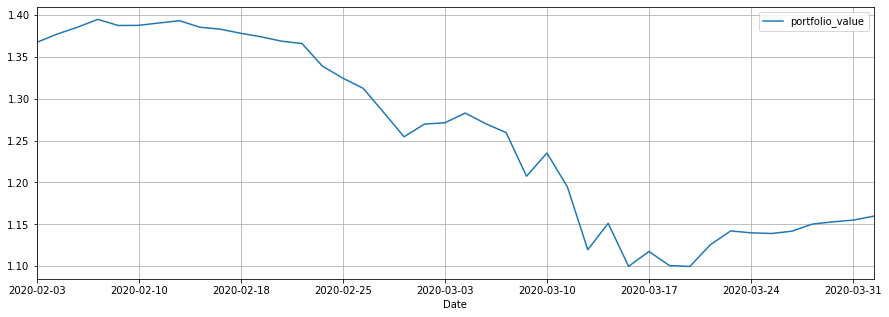

In [97]:
p_value = cal_portfolio_value(cal_portfolio_return(weights, return_frame, strategy),capital)
p_value.plot(grid=True)
p_value.loc['2020-02-01':'2020-04-01'].plot(grid=True)

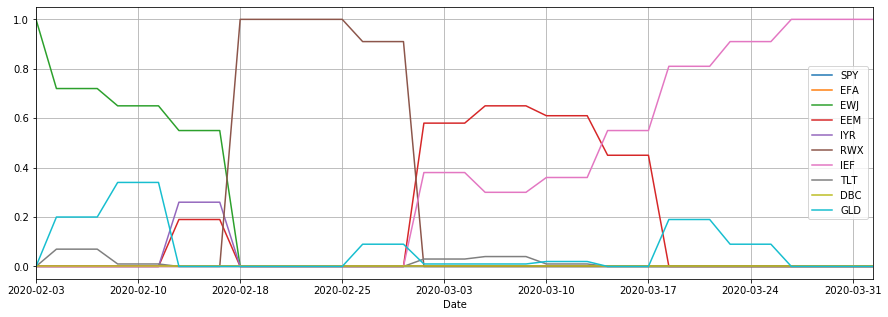

In [98]:
weights.loc['2020-02-01':'2020-04-01'].plot(grid=True)

可以看出，在更快的换仓频率下，虽然还是难免被往期表现影响而重仓EEM，但是得以在03-13，EEM 跌到低端（03-23）之前就做出减持EEM，增持IEF的正确决策，从而明显减小损失。然而有利有弊，因为迅速换仓而在三月底持有正好下跌的GLD 黄金ETF， 没能充分享受到IEF强势表现的红利。

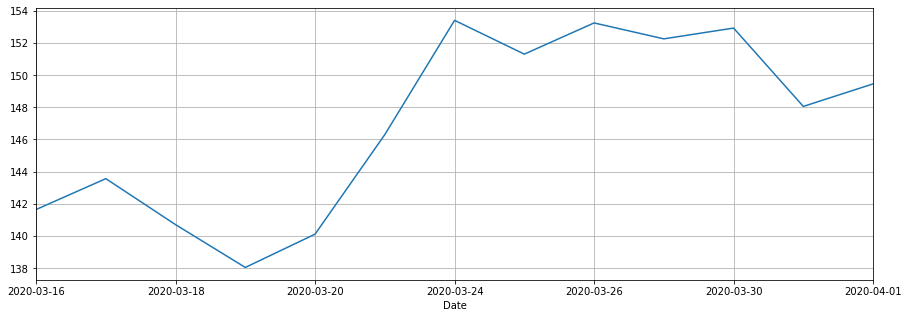

In [102]:
close_frame.GLD.loc['2020-03-15': '2020-04-01'].plot(grid=True)